Day 78: Nobel Prize Data (Even More Data Visualization! with Matplotlib, Seaborn and Plotly

# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [320]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU


In [325]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [326]:
df_data.describe()

,year
count,962.00
mean,"1,971.82"
std,33.81
min,"1,901.00"
25%,"1,948.00"
50%,"1,977.00"
75%,"2,001.00"
max,"2,020.00"


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [327]:
print(len(df_data))
df_dedupe = df_data.duplicated(['year', 'category', 'full_name'])
print(len(df_dedupe))

962
962


### Check for NaN Values

In [328]:
df_data.isna().values.any()

True

In [329]:
for col in df_data.columns:
    if df_data[col].isna().values.any():
        nas = df_data[col].isna().values.sum()
        print(f'There are {nas} missing values in {col}')

There are 88 missing values in motivation
There are 28 missing values in birth_date
There are 31 missing values in birth_city
There are 28 missing values in birth_country
There are 28 missing values in birth_country_current
There are 28 missing values in sex
There are 255 missing values in organization_name
There are 255 missing values in organization_city
There are 254 missing values in organization_country
There are 28 missing values in ISO


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [330]:
df_dated = df_data
df_dated['birth_date'] = pd.to_datetime(df_dated['birth_date'])

#### Add a Column with the Prize Share as a Percentage

In [331]:
# Create a grouped dataframe based on the number of awardees in each category-year (e.g., the two winners of the econ prize in 2020 each have a 50% share of the prize)
# UPDATE: Apparently there was a "prize_share" variable that made these proceeding steps unnecessarily complicated. Oh well.
df_grouped = df_dated.groupby(['year', 'category']).count()
df_grouped['share_pct'] = 1/df_grouped['full_name']
df_grouped = df_grouped['share_pct']
df_grouped = df_grouped.reset_index()
df_grouped.tail()

,year,category,share_pct
598,2020,Economics,0.50
599,2020,Literature,1.00
600,2020,Medicine,0.33
601,2020,Peace,1.00
602,2020,Physics,0.33


In [332]:
# Merge with previous dataframe
df = df_dated.merge(df_grouped, on=['year', 'category'])
df

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.33
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.33


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [333]:
gender = df['sex'].value_counts()
fig = px.pie(labels=gender.index,
             values=gender.values,
             title='Share of Winner by Gender',
             names=gender.index,
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did they win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [334]:
df_female = df[df['sex']=='Female']
df_female.sort_values('year')[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.33
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [335]:
df_names = df.value_counts('full_name')
df_names = pd.DataFrame(df_names, columns=['count'])
df_names.query('count > 1')

,count
full_name,
Comité international de la Croix Rouge (International Committee of the Red Cross),3
"Marie Curie, née Sklodowska",2
Linus Carl Pauling,2
Frederick Sanger,2
John Bardeen,2
Office of the United Nations High Commissioner for Refugees (UNHCR),2


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [336]:
df['category'].unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [337]:
df_cat = df.value_counts('category')

v_bar = px.bar(x=df_cat.index, y=df_cat.values,
               color=df_cat.values, color_continuous_scale='Aggrnyl',
               title='Number of Nobel Prizes Awarded by Category')
v_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Prizes',
                    coloraxis_showscale=False)

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [338]:
df_econ = df[df['category']=='Economics']
df_econ.sort_values('year')[:1]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

In [339]:
df_cat_gender = df.value_counts(['category', 'sex'])

v_bar_split = px.bar(x=df_cat_gender.index.get_level_values('category'),
                     y=df_cat_gender.values,
                     color=df_cat_gender.index.get_level_values('sex'),
                     title='Number of Nobel Prizes Awarded by Category and Gender')

v_bar_split.update_layout(xaxis_title='Prize Category',
                          yaxis_title='Number of Prizes')

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 


* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [340]:
df_year = df.groupby('year').count()['prize']
df_5year = df_year.rolling(window=5).mean()
df_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

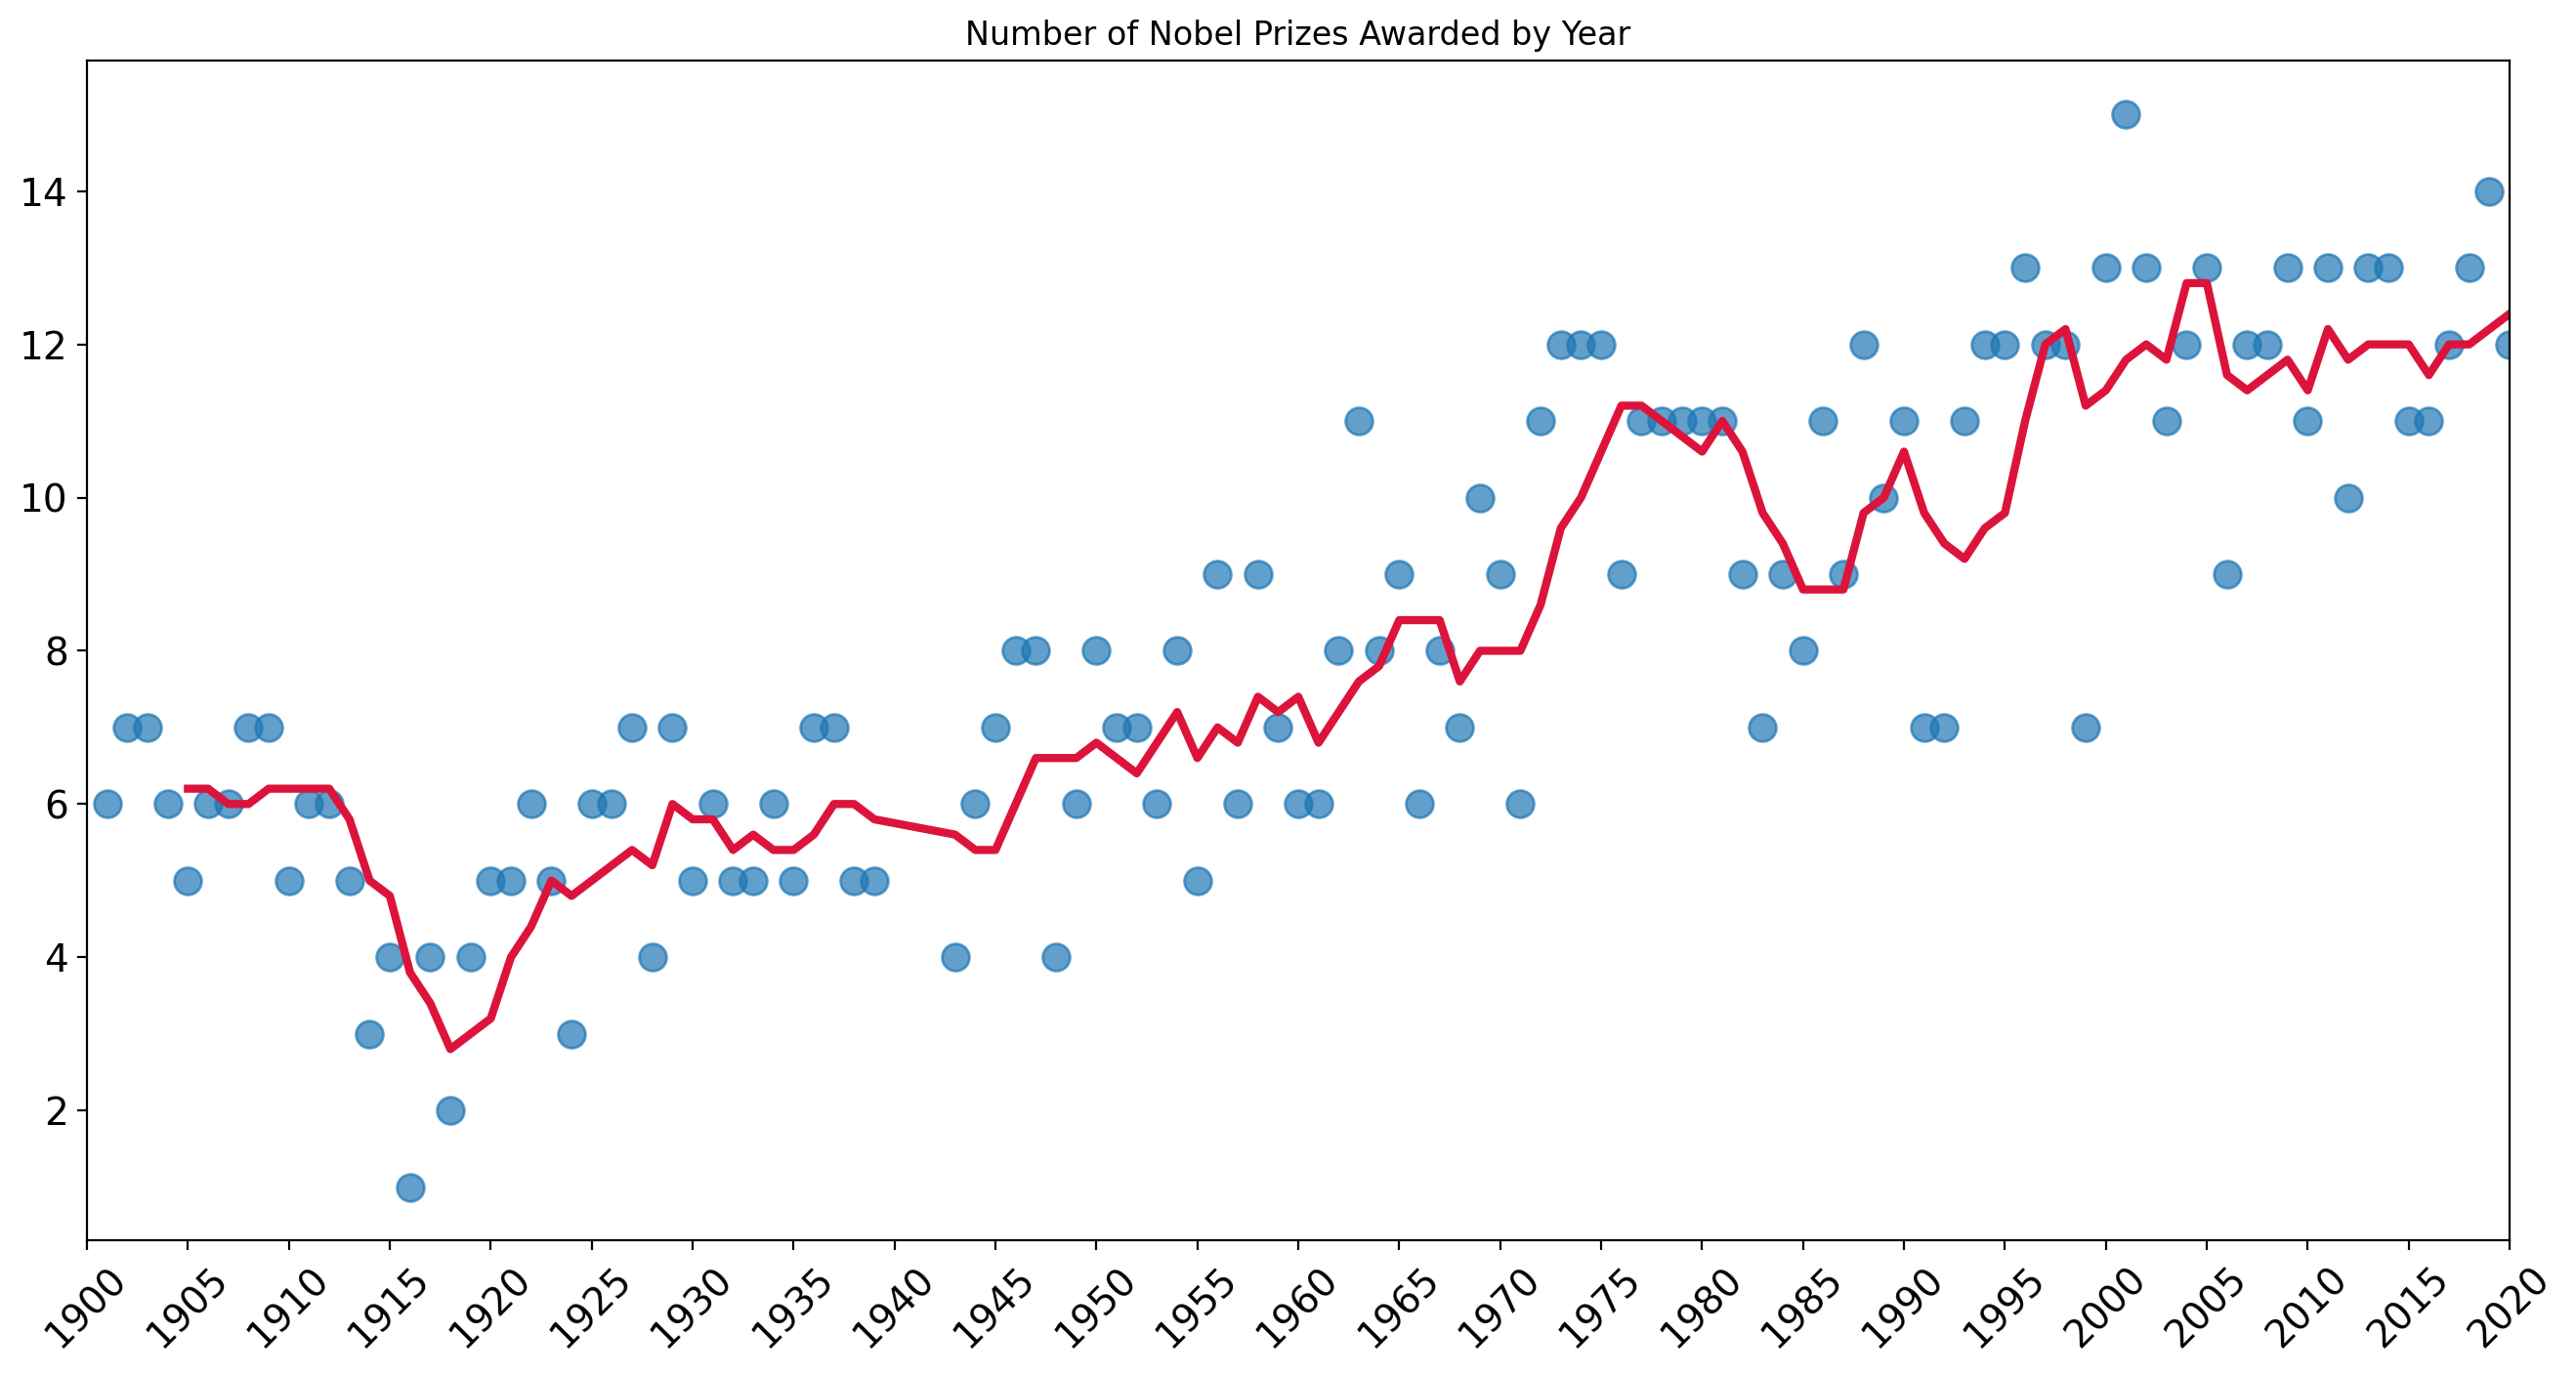

In [341]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded by Year')
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)

ax = plt.gca()
ax.set_xlim(1900, 2020)

plt.scatter(x=df_year.index, y=df_year.values, alpha=0.7, s=100)
plt.plot(df_5year.index, df_5year.values, c='crimson', linewidth=3)



# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [342]:
df_share = df.groupby('year').agg({'share_pct': pd.Series.mean})
df_share_5y = df_share.rolling(window=5).mean()
df_share

,share_pct
year,
1901,0.83
1902,0.71
1903,0.71
1904,0.83
1905,1.00
...,...
2016,0.55
2017,0.50
2018,0.46


In [343]:
df_share_5y

,share_pct
year,
1901,NaN
1902,NaN
1903,NaN
1904,NaN
1905,0.82
...,...
2016,0.52
2017,0.50
2018,0.50


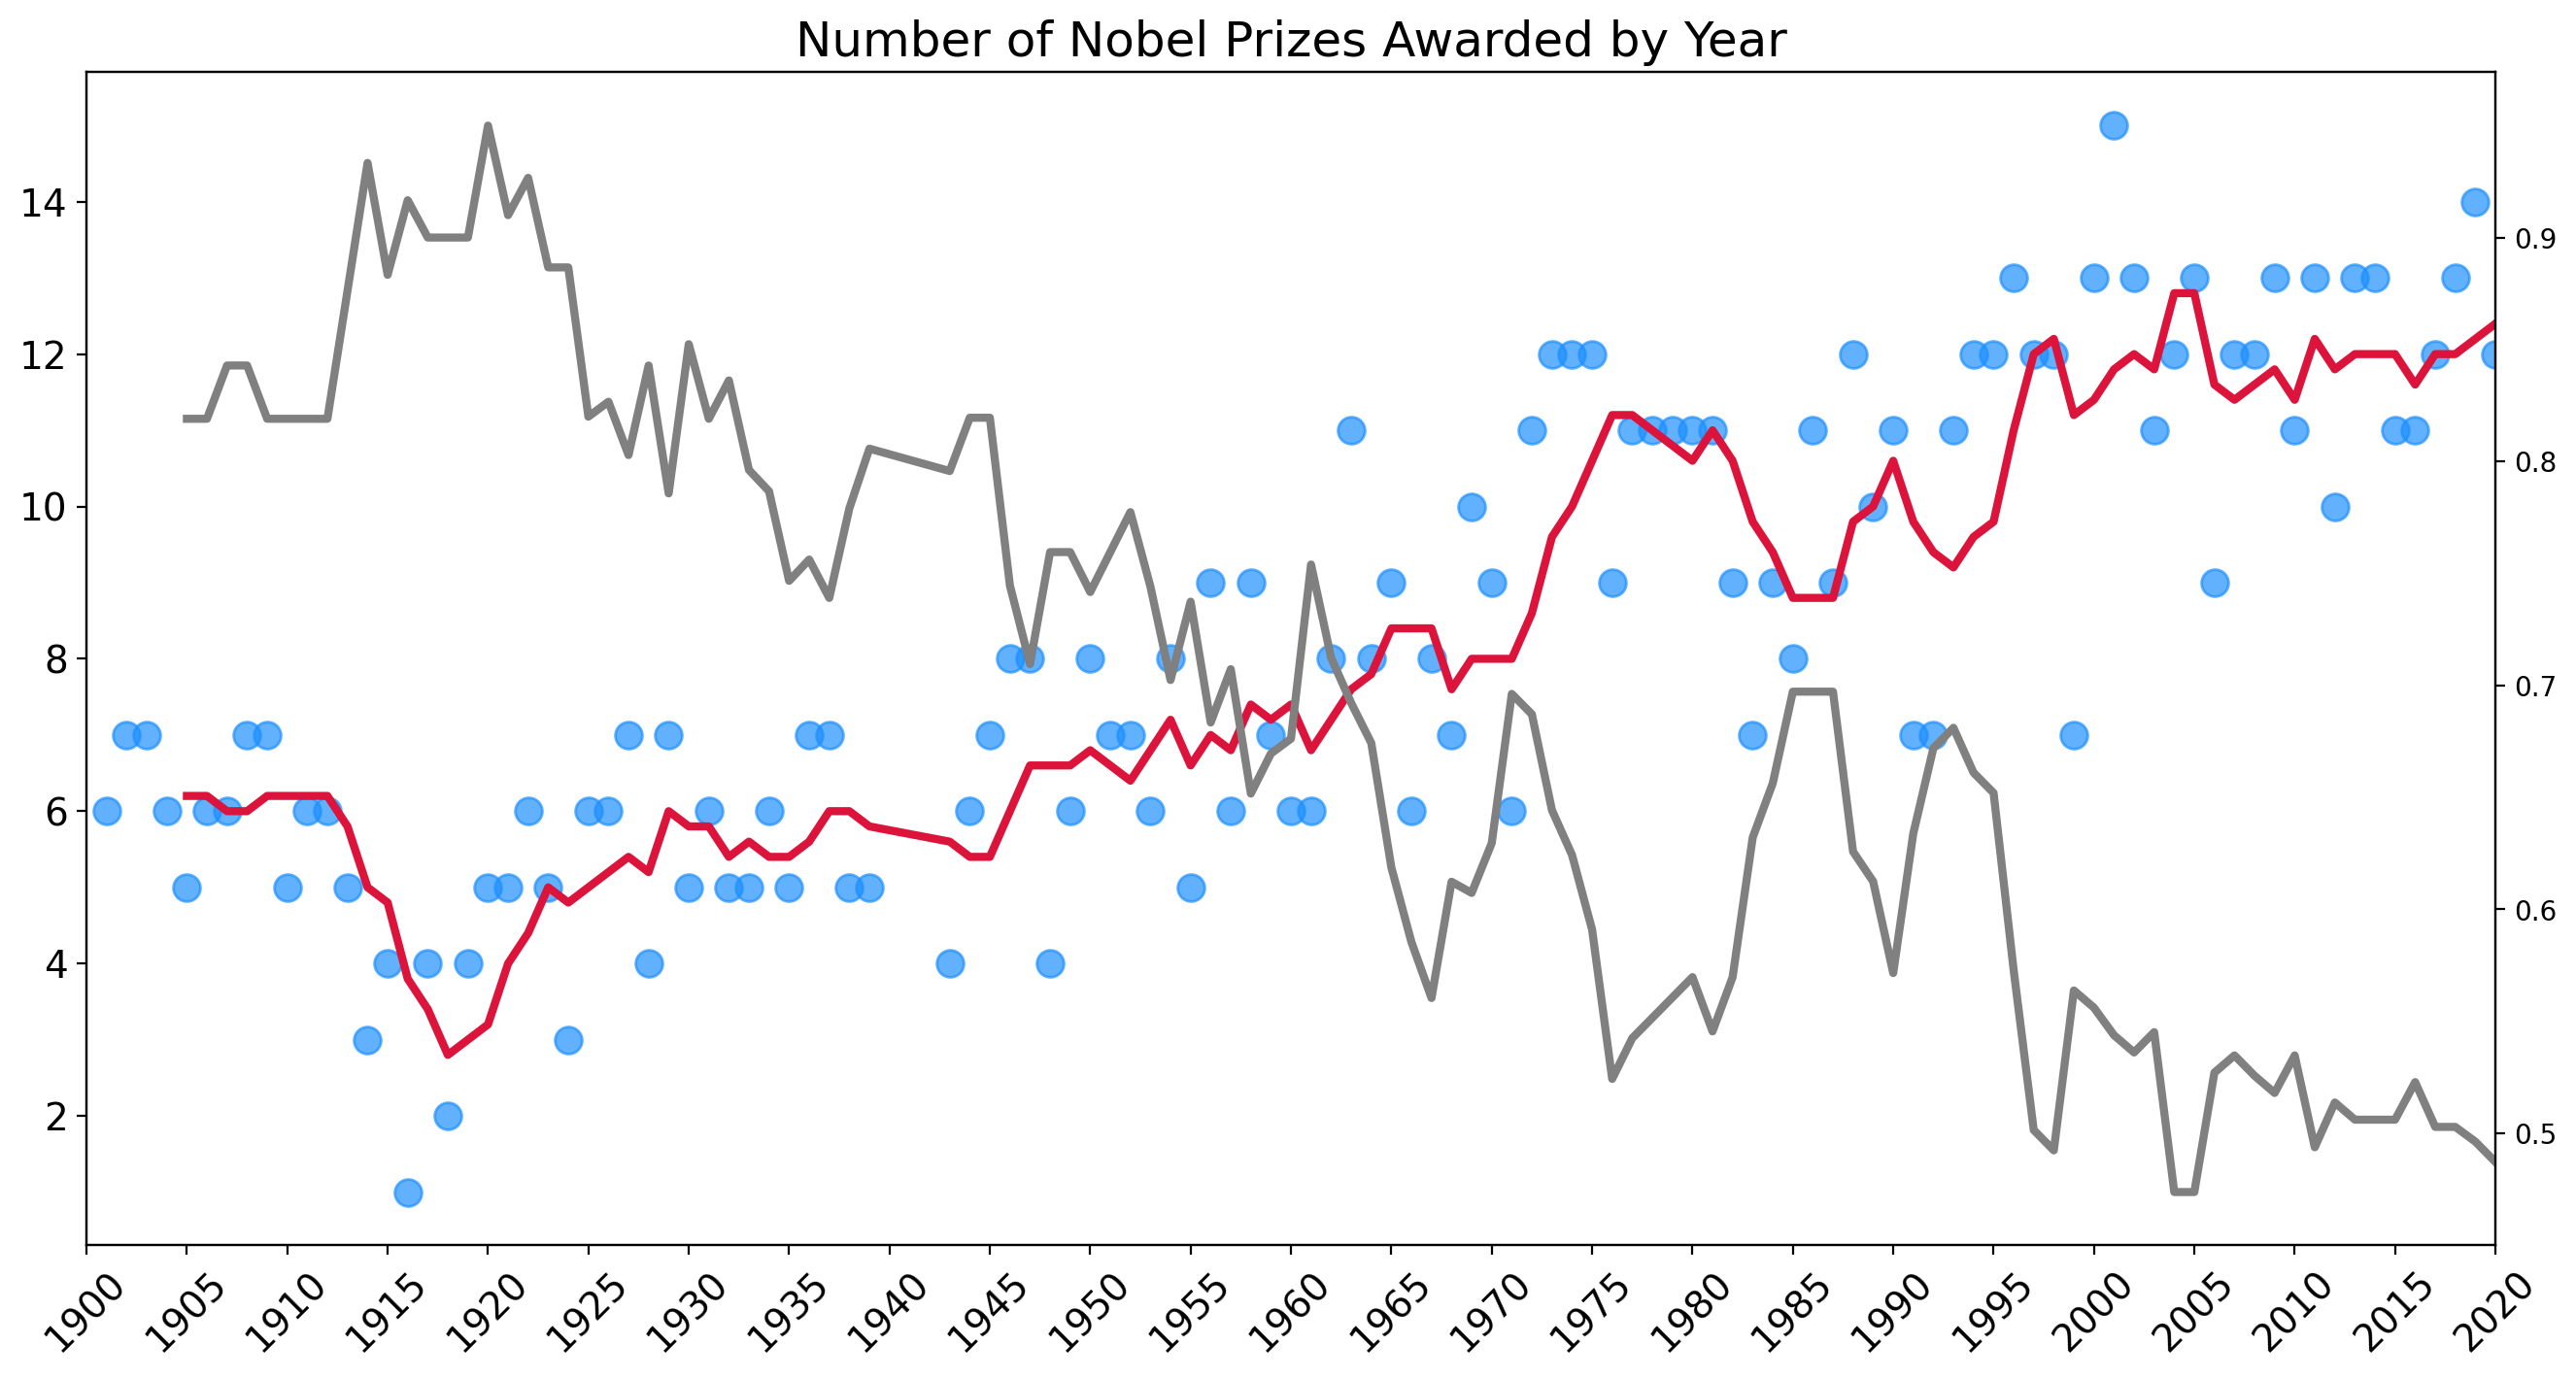

In [344]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded by Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)

ax1.scatter(x=df_year.index, y=df_year.values,
            c='dodgerblue', alpha=0.7, s=100)
ax1.plot(df_5year.index, df_5year.values, c='crimson', linewidth=3)

ax2.plot(df_share_5y.index, df_share_5y.values, c='grey', linewidth=3)

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.
* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:
* What is the ranking for the top 20 countries in terms of the number of prizes?

In [345]:
df.groupby('birth_country').count()['prize']

birth_country
Argentina                                    4
Australia                                   10
Austria                                     15
Austria-Hungary (Austria)                    1
Austria-Hungary (Bosnia and Herzegovina)     1
                                            ..
Venezuela                                    1
Vietnam                                      1
W&uuml;rttemberg (Germany)                   1
West Germany (Germany)                       5
Yemen                                        1
Name: prize, Length: 124, dtype: int64

In [346]:
df.groupby('birth_country_current').count()['prize']

birth_country_current
Algeria                       2
Argentina                     4
Australia                    10
Austria                      18
Azerbaijan                    1
                           ... 
United States of America    281
Venezuela                     1
Vietnam                       1
Yemen                         1
Zimbabwe                      1
Name: prize, Length: 79, dtype: int64

In [347]:
top20_countries = df.groupby('birth_country_current').count()
top20_countries = top20_countries.sort_values('prize', ascending=False)['prize'][:20]
top20_countries

birth_country_current
United States of America    281
United Kingdom              105
Germany                      84
France                       57
Sweden                       29
Japan                        27
Poland                       27
Russia                       26
Canada                       20
Switzerland                  19
Italy                        19
Austria                      18
Netherlands                  18
Denmark                      12
China                        12
Norway                       12
Australia                    10
Belgium                       9
India                         9
South Africa                  9
Name: prize, dtype: int64

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [348]:
df_countries = df.groupby(['ISO','birth_country_current']).count()
df_countries = df_countries.reset_index()[['ISO', 'prize', 'birth_country_current']]
df_countries

,ISO,prize,birth_country_current
0,ARG,4,Argentina
1,AUS,10,Australia
2,AUT,18,Austria
3,AZE,1,Azerbaijan
4,BEL,9,Belgium
...,...,...,...
74,VEN,1,Venezuela
75,VNM,1,Vietnam
76,YEM,1,Yemen
77,ZAF,9,South Africa


In [349]:
map = px.choropleth(df_countries,
                    locations='ISO',
                    color='prize',
                    hover_name='birth_country_current',
                    color_continuous_scale=px.colors.sequential.matter)
map.update_layout(coloraxis_showscale=True)

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

In [350]:
df_cat_country = df.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
df_cat_country.sort_values(by='prize', ascending=False)

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [351]:
df_cat_country20 = df_cat_country.merge(top20_countries.reset_index(), on='birth_country_current')
df_cat_country20 = df_cat_country20.rename(columns={'prize_x':'cat_prize', 'prize_y':'total_prize'})
df_cat_country20 = df_cat_country20.sort_values('total_prize', ascending=True)
df_cat_country20

,birth_country_current,category,cat_prize,total_prize
85,South Africa,Peace,3,9
47,India,Physics,1,9
46,India,Peace,1,9
45,India,Medicine,2,9
44,India,Literature,2,9
...,...,...,...,...
105,United States of America,Literature,10,281
107,United States of America,Peace,19,281
103,United States of America,Chemistry,55,281
104,United States of America,Economics,49,281


In [352]:
country_bar = px.bar(x=df_cat_country20['cat_prize'],
                     y=df_cat_country20['birth_country_current'],
                     color=df_cat_country20['category'],
                     orientation='h',
                     title='Top 20 Countries by Number of Prizes and Category')

country_bar.update_layout(xaxis_title='Number of Prizes',
                          yaxis_title='Country')

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [353]:
df_country_year = df.groupby(by=['birth_country_current', 'year'], as_index=False).count()
df_country_year = df_country_year.sort_values('year')[['year','birth_country_current', 'prize']]
df_country_year

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [354]:
df_country_year_cum = df_country_year.groupby(['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
df_country_year_cum

prize
birth_country_current    year       
Algeria                  1957      1
                         1997      2
Argentina                1936      1
                         1947      2
                         1980      3
...                              ...
United States of America 2020    281
Venezuela                1980      1
Vietnam                  1973      1
Yemen                    2011      1
Zimbabwe                 1960      1

[627 rows x 1 columns]

In [355]:
l_chart = px.line(df_country_year_cum,
                  x=df_country_year_cum.index.get_level_values('year'),
                  y='prize',
                  color=df_country_year_cum.index.get_level_values('birth_country_current'),
                  hover_name=df_country_year_cum.index.get_level_values('birth_country_current')
                  )
l_chart.update_layout(xaxis_title='Year', yaxis_title='Number of Prizes')

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates.

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [356]:
top20_orgs = df['organization_name'].value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)

In [357]:
org_bar = px.bar(x=top20_orgs.values,
                 y=top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Organizations by Number of Nobel Prizes')

org_bar.update_layout(xaxis_title='Number of Prizes',
                      yaxis_title='Organization',
                      coloraxis_showscale=False)

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [358]:
top20_org_cities = df['organization_city'].value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)

In [359]:
city_bar = px.bar(x=top20_org_cities.values,
                  y=top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Top 20 Organization Cities by Number of Nobel Prizes')
city_bar.update_layout(xaxis_title='Number of Prizes',
                       yaxis_title='City',
                       coloraxis_showscale=False)

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [360]:
top20_birth_cities = df['birth_city'].value_counts()[:20]
top20_birth_cities.sort_values(ascending=True, inplace=True)

In [361]:
city_bar = px.bar(x=top20_birth_cities.values,
                  y=top20_birth_cities.index,
                  orientation='h',
                  color=top20_birth_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Top 20 Birth Cities by Number of Nobel Prizes')
city_bar.update_layout(xaxis_title='Number of Prizes',
                       yaxis_title='City',
                       coloraxis_showscale=False)

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?



In [362]:
df_country_city_org = df.groupby(['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize': pd.Series.count})
df_country_city_org = df_country_city_org.sort_values('prize', ascending=False)
df_country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [363]:
burst=px.sunburst(df_country_city_org,
                  path=['organization_country', 'organization_city', 'organization_name'],
                  values='prize',
                  title='Organization Name, City and Country of Nobel Laureates')
burst.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='City',
                    coloraxis_showscale=False)

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [364]:
birth_years = df.birth_date.dt.year

In [365]:
df['winning_age'] = df.year - birth_years
df['winning_age']

0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958     NaN
959   55.00
960   68.00
961   89.00
Name: winning_age, Length: 962, dtype: float64

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [366]:
display(df.nlargest(n=1, columns='winning_age'))
display(df.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [367]:
df['winning_age'].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

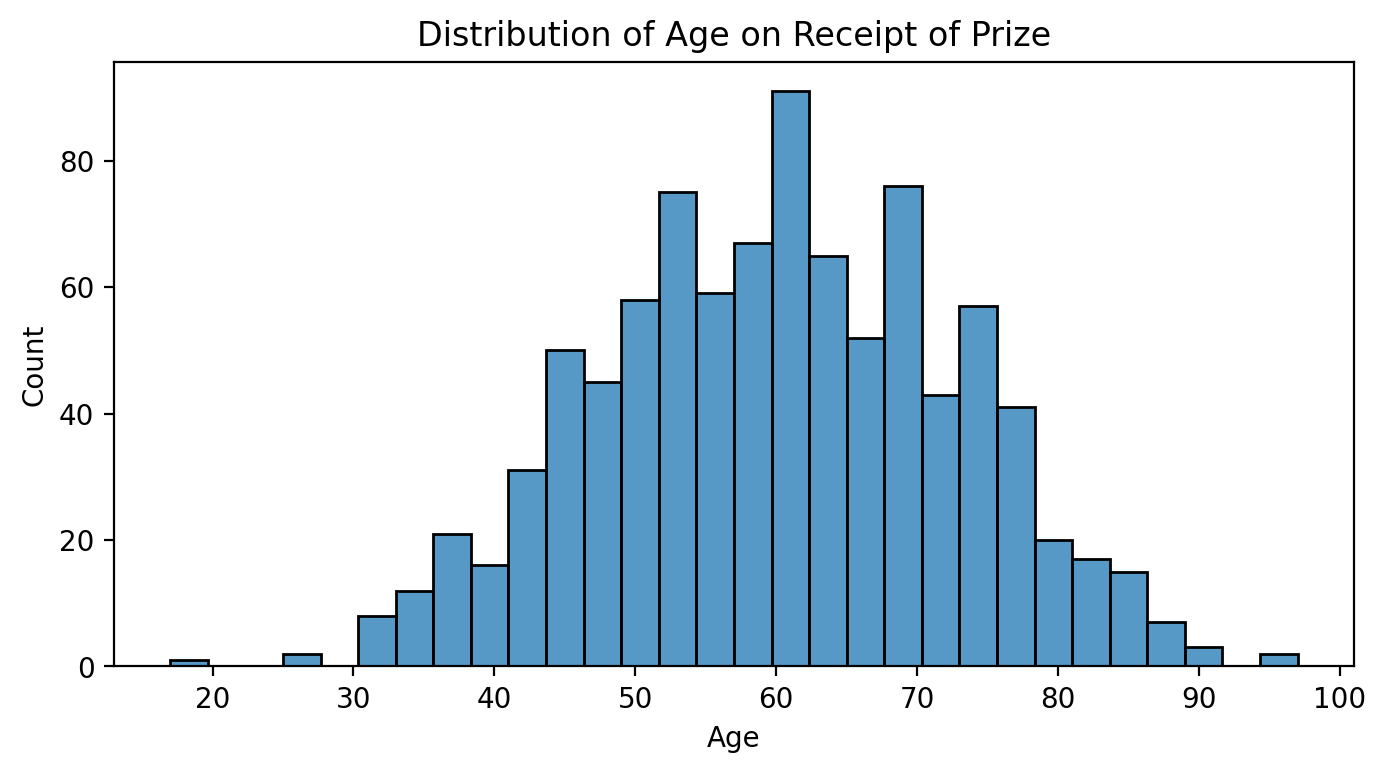

In [368]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df,
             x=df.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


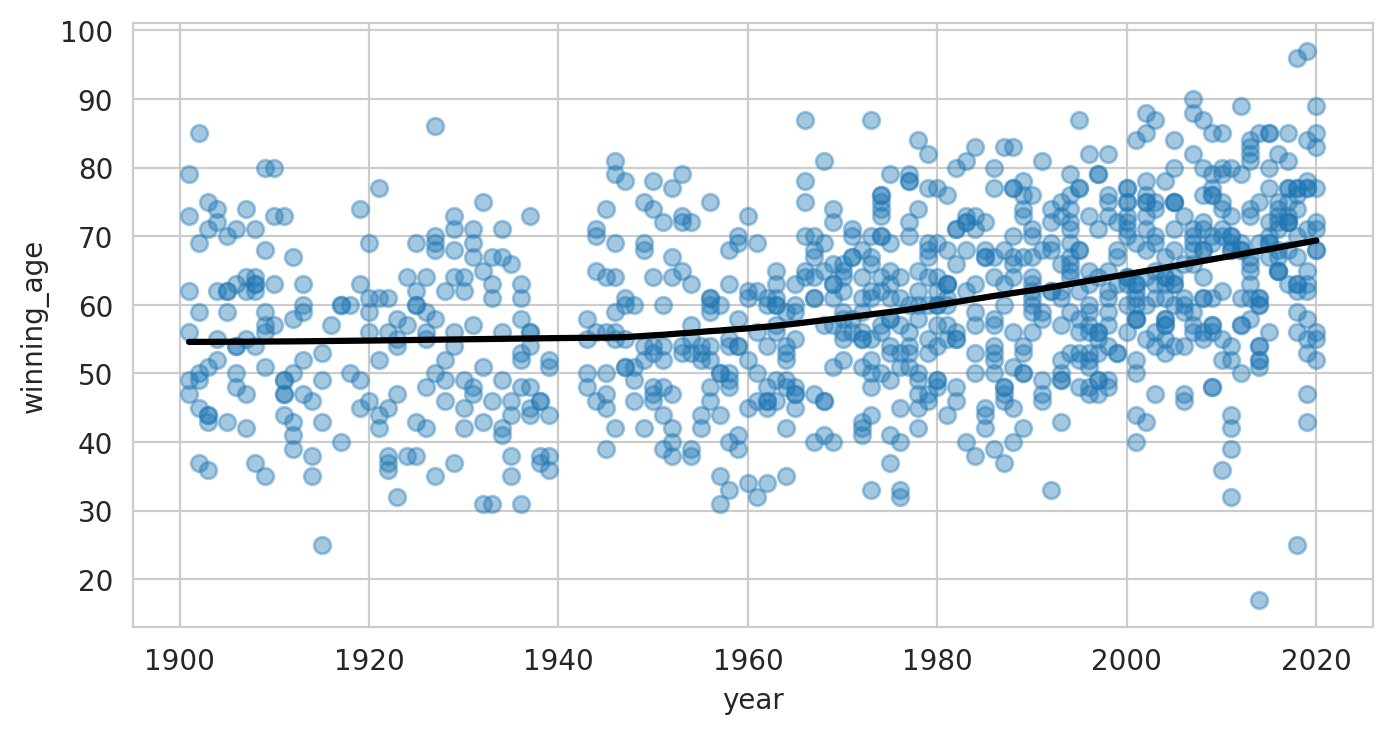

In [369]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df,
                x='year',
                y='winning_age',
                lowess=True,
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

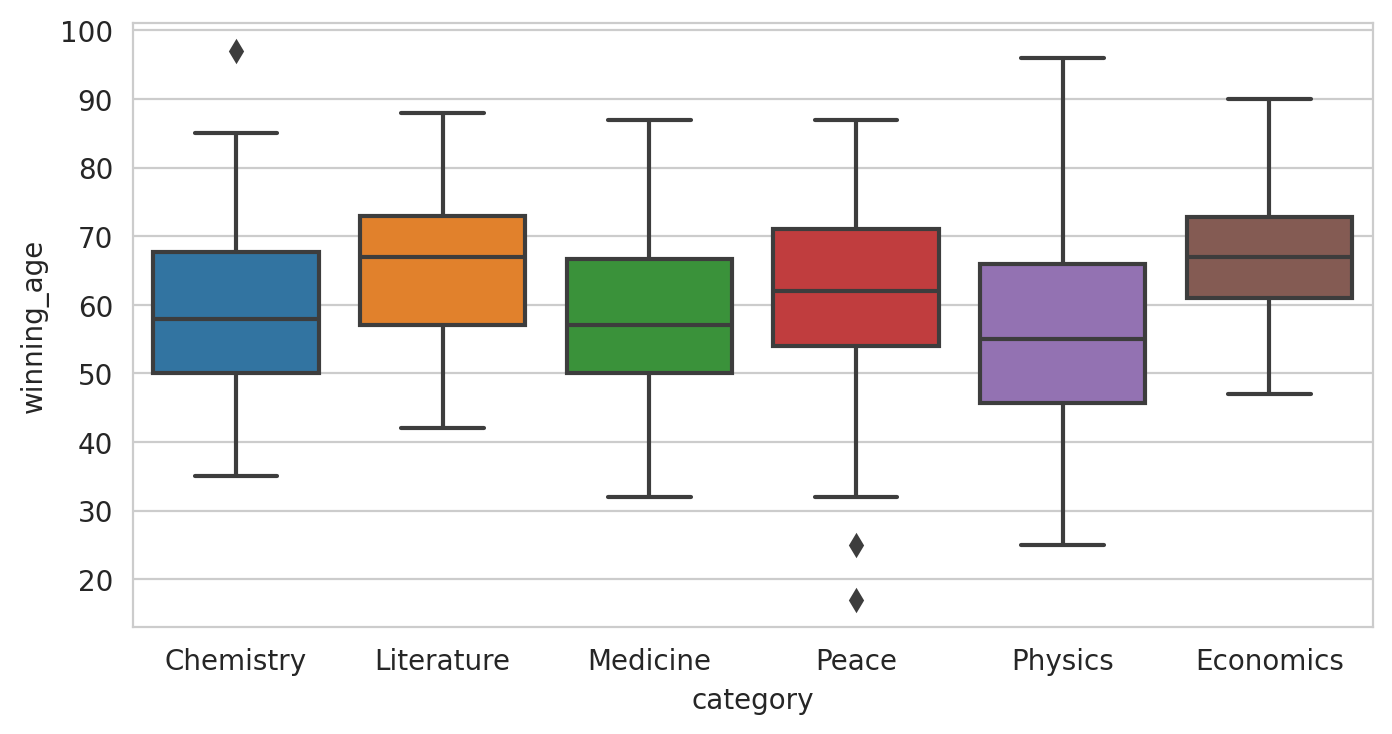

In [370]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df,
                x='category',
                y='winning_age')

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


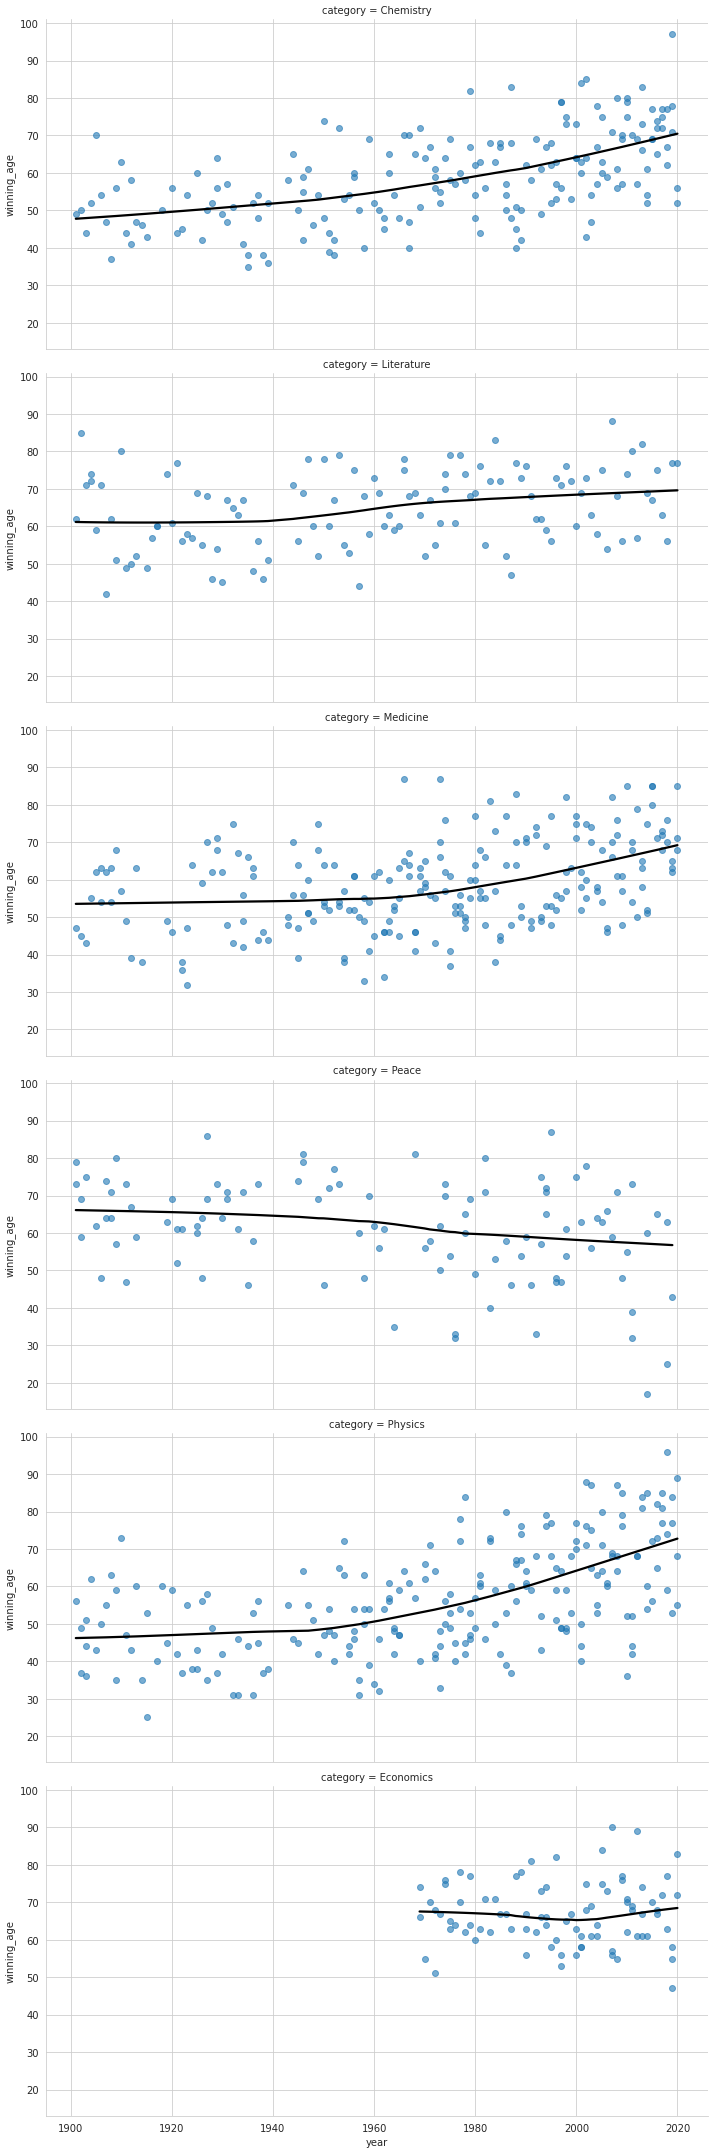

In [371]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df,
               x='year',
               y='winning_age',
               row = 'category',
               lowess=True,
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)